### Supermarket Transactions Dataset --- Marketing Analytics

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('MLdata.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head()

,ITEMCODE,FICHENO,DATE_,LINENET,BRANCH,SALESMAN,CLIENTCODE,BRAND,CATEGORY_NAME1,CATEGORY_NAME2,GENDER,DNAME,WNAME,MNAME,DISCOUNT_PERCENTAGE,CHURN
0,8,18105,2017-01-06,12.27,Antalya Subesi,İlhan ÖRENLİ,131464,TOZ NA,İÇECEK,ÇAY KAHVE,E,Friday,1,January,7.396226,Churned
1,11340,18040,2017-01-05,1.80,Adana Subesi,Ramazan SARIMEHMET,630399,VİVİDENT,GIDA,SAKIZ SEKERLEME,K,Thursday,1,January,7.692308,Churned
2,5780,16853,2017-01-05,4.98,Osmaniye Subesi,Muhammed Ali KUŞOGLU,736930,HAL,MEYVE SEBZE,SEBZE,K,Thursday,1,January,7.434944,Churned
3,5715,16840,2017-01-05,2.73,Mersin Subesi,Ebubekir SUVEREN,107440,HAL,MEYVE SEBZE,SEBZE,E,Thursday,1,January,7.457627,Retained
4,5711,16593,2017-01-05,1.73,Adana Subesi,Ramazan SARIMEHMET,900157,HAL,MEYVE SEBZE,SEBZE,E,Thursday,1,January,7.486631,Churned


In [3]:
y = list(df.groupby("CLIENTCODE")["LINENET"].sum().sort_values(ascending=False)[0:50].index)

In [4]:
hdf = df[df['CLIENTCODE'].isin(y)]

In [5]:
hlst = list(hdf[['CLIENTCODE', 'LINENET', 'CATEGORY_NAME1']].groupby(['CLIENTCODE', 'CATEGORY_NAME1']).sum()['LINENET'].index)

In [6]:
clst = []
ilst = []
for i,j in hlst:
    ilst.append(j)
    clst.append(i)

In [7]:
rlst = list(hdf[['CLIENTCODE', 'LINENET', 'CATEGORY_NAME1']].groupby(['CLIENTCODE', 'CATEGORY_NAME1'], as_index = False).sum()['LINENET'])

In [8]:
shdf = pd.DataFrame({'CLIENTCODE':clst, 'CATEGORY_NAME1':ilst, 'LINENET':rlst})#['CLIENTCODE'].astype('float64'))

In [9]:
shdf['CLIENTCODE'] = shdf['CLIENTCODE'].astype('float64').astype('int64')

In [10]:
# shdf['CLIENTCODE'] = shdf['CLIENTCODE'].astype('object')

In [11]:
# pd.get_dummies(shdf, columns=['CATEGORY_NAME1'], drop_first=True).drop(columns=['CLIENTCODE'])

In [12]:
shdf.drop(columns=['CLIENTCODE'])

,CATEGORY_NAME1,LINENET
0,ET TAVUK,230.93
1,DETERJAN TEMİZLİK,26.51
2,ET TAVUK,29.07
3,EV,2.29
4,GIDA,140.00
...,...,...
305,ET TAVUK,19.95
306,GIDA,78.02
307,MEYVE SEBZE,10.99
308,SÜT KAHVALTILIK,79.75


C:\Users\Apurva\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Apurva\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Apurva\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

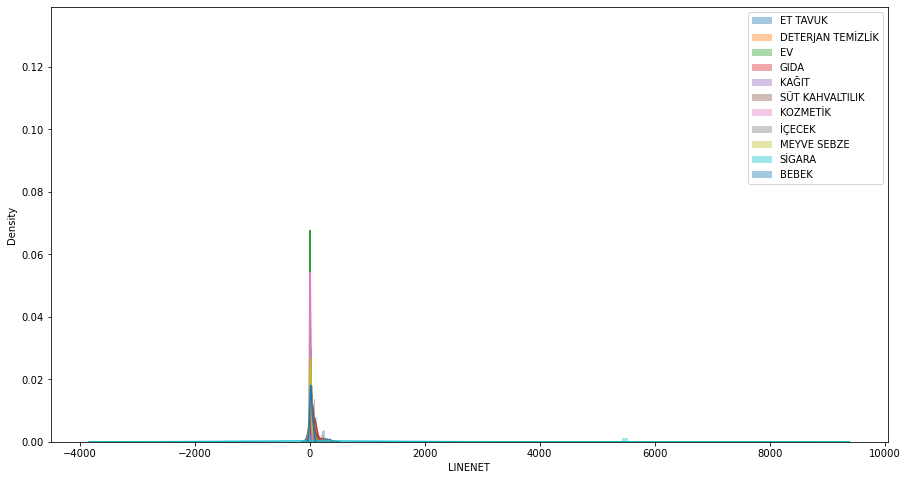

In [13]:
plt.figure(figsize=(15,8))
for i in shdf['CATEGORY_NAME1'].unique():
    sns.distplot(shdf[shdf['CATEGORY_NAME1'] == i]['LINENET'], label=i)
plt.legend()
plt.show()

In [14]:
z = df.groupby("CLIENTCODE")["LINENET"].sum().sort_values(ascending=False)
z = z.drop(index=z.index[0])

In [15]:
# b = df.groupby(['CLIENTCODE']).sum()['LINENET'].sort_values(ascending=False)
z.describe()

count    17803.000000
mean        15.645229
std         25.725657
min          0.020000
25%          3.110000
50%          7.790000
75%         17.615000
max        794.080000
Name: LINENET, dtype: float64

In [16]:
z

CLIENTCODE
615054      794.08
369100.0    464.97
26412       406.47
86735       382.25
254964.0    381.16
             ...  
184145.0      0.17
638808        0.17
322243        0.17
939840.0      0.17
361844        0.02
Name: LINENET, Length: 17803, dtype: float64

C:\Users\Apurva\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Apurva\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Apurva\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

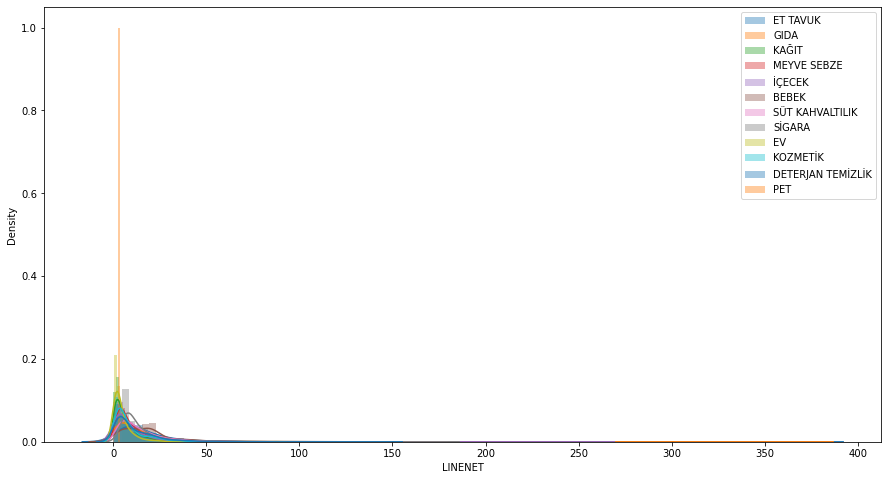

In [17]:
a = list(z[z>17].index)
adf = df[df['CLIENTCODE'].isin(a)]

toplst = list(adf[['CLIENTCODE', 'LINENET', 'CATEGORY_NAME1']].groupby(['CLIENTCODE', 'CATEGORY_NAME1']).sum()['LINENET'].index)

clst = []
ilst = []
for i,j in toplst:
    ilst.append(j)
    clst.append(i)

rlst = list(adf[['CLIENTCODE', 'LINENET', 'CATEGORY_NAME1']].groupby(['CLIENTCODE', 'CATEGORY_NAME1'],
                                                                     as_index = False).sum()['LINENET'])
    
topdf = pd.DataFrame({'CATEGORY_NAME1':ilst, 'LINENET':rlst})    

plt.figure(figsize=(15,8))
for i in topdf['CATEGORY_NAME1'].unique():
    sns.distplot(topdf[topdf['CATEGORY_NAME1'] == i]['LINENET'], label=i)
plt.legend()
plt.show()

In [18]:
c = list(z[z<3].index)
cdf = df[df['CLIENTCODE'].isin(c)]

C:\Users\Apurva\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Apurva\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Apurva\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `k

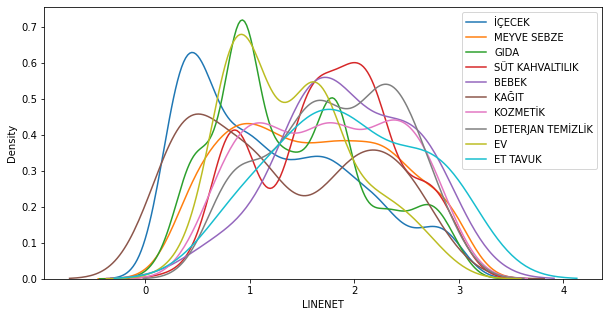

In [19]:
lowlst = list(cdf[['CLIENTCODE', 'LINENET', 'CATEGORY_NAME1']].groupby(['CLIENTCODE', 'CATEGORY_NAME1']).sum()['LINENET'].index)

clst = []
ilst = []
for i,j in lowlst:
    ilst.append(j)
    clst.append(i)

rlst = list(cdf[['CLIENTCODE', 'LINENET', 'CATEGORY_NAME1']].groupby(['CLIENTCODE', 'CATEGORY_NAME1'],
                                                                     as_index = False).sum()['LINENET'])
    
lowdf = pd.DataFrame({'CATEGORY_NAME1':ilst, 'LINENET':rlst})    

plt.figure(figsize=(10,5))
for i in lowdf['CATEGORY_NAME1'].unique():
    sns.distplot(lowdf[lowdf['CATEGORY_NAME1'] == i]['LINENET'], label=i, hist=False)
plt.legend()
plt.show()

In [20]:
d = list(z[(z<17) & (z>7)].index)
ddf = df[df['CLIENTCODE'].isin(d)]

C:\Users\Apurva\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Apurva\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Apurva\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `k

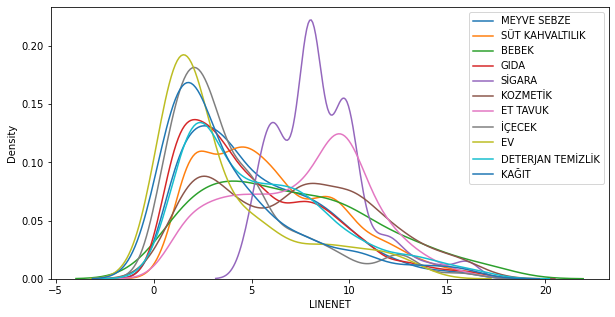

In [21]:
q3lst = list(ddf[['CLIENTCODE', 'LINENET', 'CATEGORY_NAME1']].groupby(['CLIENTCODE', 'CATEGORY_NAME1']).sum()['LINENET'].index)

clst = []
ilst = []
for i,j in q3lst:
    ilst.append(j)
    clst.append(i)

rlst = list(ddf[['CLIENTCODE', 'LINENET', 'CATEGORY_NAME1']].groupby(['CLIENTCODE', 'CATEGORY_NAME1'],
                                                                     as_index = False).sum()['LINENET'])
    
q3df = pd.DataFrame({'CATEGORY_NAME1':ilst, 'LINENET':rlst})    

plt.figure(figsize=(10,5))
for i in q3df['CATEGORY_NAME1'].unique():
    sns.distplot(q3df[q3df['CATEGORY_NAME1'] == i]['LINENET'], label=i, hist=False)
plt.legend()
plt.show()

In [22]:
e = list(z[(z<7) & (z>3)].index)
edf = df[df['CLIENTCODE'].isin(e)]

C:\Users\Apurva\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Apurva\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Apurva\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `k

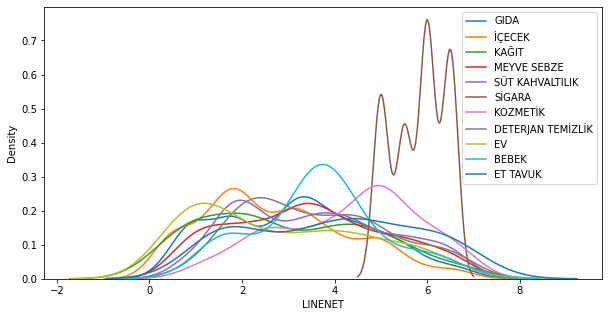

In [23]:
q4lst = list(edf[['CLIENTCODE', 'LINENET', 'CATEGORY_NAME1']].groupby(['CLIENTCODE', 'CATEGORY_NAME1']).sum()['LINENET'].index)

clst = []
ilst = []
for i,j in q4lst:
    ilst.append(j)
    clst.append(i)

rlst = list(edf[['CLIENTCODE', 'LINENET', 'CATEGORY_NAME1']].groupby(['CLIENTCODE', 'CATEGORY_NAME1'],
                                                                     as_index = False).sum()['LINENET'])
    
q4df = pd.DataFrame({'CATEGORY_NAME1':ilst, 'LINENET':rlst})    

plt.figure(figsize=(10,5))
for i in q4df['CATEGORY_NAME1'].unique():
    sns.distplot(q4df[q4df['CATEGORY_NAME1'] == i]['LINENET'], label=i, hist=False)
plt.legend()
plt.show()

C:\Users\Apurva\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Apurva\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Apurva\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `k

C:\Users\Apurva\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Apurva\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Apurva\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `k

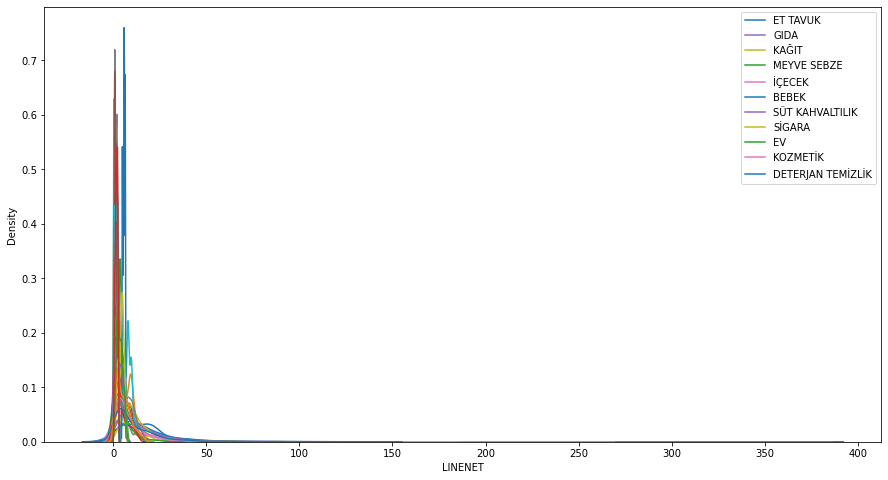

In [24]:
plt.figure(figsize=(15,8))
for i in topdf['CATEGORY_NAME1'].unique():
    sns.distplot(topdf[topdf['CATEGORY_NAME1'] == i]['LINENET'], label=i, hist=False)
    sns.distplot(q3df[q3df['CATEGORY_NAME1'] == i]['LINENET'], hist=False)
    sns.distplot(q4df[q4df['CATEGORY_NAME1'] == i]['LINENET'], hist=False)
    sns.distplot(lowdf[lowdf['CATEGORY_NAME1'] == i]['LINENET'], hist=False)
plt.legend()
plt.show()

In [25]:
df[['CLIENTCODE', 'LINENET', 'CATEGORY_NAME1']].groupby(['CLIENTCODE', 'CATEGORY_NAME1']).sum()['LINENET']

CLIENTCODE  CATEGORY_NAME1
1           ET TAVUK          64.10
            GIDA               9.03
            KAĞIT              2.75
            MEYVE SEBZE        3.03
            İÇECEK             0.60
                              ...  
999826      MEYVE SEBZE       16.19
999862.0    MEYVE SEBZE        2.49
999965      GIDA               0.93
ÿ           GIDA               0.69
            İÇECEK             0.65
Name: LINENET, Length: 36202, dtype: float64

In [3]:
dflst = list(df[['CLIENTCODE', 'LINENET', 'CATEGORY_NAME1']].groupby(['CLIENTCODE', 'CATEGORY_NAME1']).sum()['LINENET'].index)

clst = []
ilst = []
for i,j in dflst:
    ilst.append(j)
    clst.append(i)

rlst = list(df[['CLIENTCODE', 'LINENET', 'CATEGORY_NAME1']].groupby(['CLIENTCODE', 'CATEGORY_NAME1'],
                                                                     as_index = False).sum()['LINENET'])
    
mldf = pd.DataFrame({'CATEGORY_NAME1':ilst, 'LINENET':rlst}) 

In [4]:
mldf

,CATEGORY_NAME1,LINENET
0,ET TAVUK,64.10
1,GIDA,9.03
2,KAĞIT,2.75
3,MEYVE SEBZE,3.03
4,İÇECEK,0.60
...,...,...
36197,MEYVE SEBZE,16.19
36198,MEYVE SEBZE,2.49
36199,GIDA,0.93
36200,GIDA,0.69


In [7]:
usldf = pd.get_dummies(mldf, columns=['CATEGORY_NAME1'], drop_first=True)

In [8]:
x = usldf.values

In [30]:
from sklearn.cluster import KMeans 
wcv = []

for i in range(1, 11): 
    km = KMeans(n_clusters = i) 
    km.fit(x) 
    wcv.append(km.inertia_)

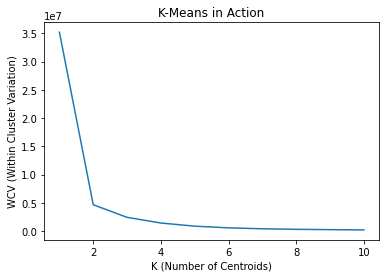

In [31]:
plt.plot(range(1, 11), wcv)
plt.xlabel('K (Number of Centroids)')
plt.ylabel('WCV (Within Cluster Variation)')
plt.title('K-Means in Action')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score 

silhouette = []

for i in range(2, 11): 
    km = KMeans(n_clusters = i)
    km.fit(x) 
    silhouette.append(silhouette_score(x, km.labels_)) 
plt.plot(range(2, 11), silhouette)
plt.xlabel('K (Number of Centroids)')
plt.ylabel('Silhouette Score')
plt.title('K-Means in Action')
plt.show()

In [ ]:
# import scipy.cluster.hierarchy as sch
# plt.figure(figsize=(15,8))
# sch.dendrogram(sch.linkage(x, method = 'ward')) 
# plt.show()

-- Warning
-- very dangerous attempt at your own risk, computer may blast or your mind will blast 